# Import 

In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import os
import pathlib
import glob
import datetime as dt 
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import missingno

idx=pd.IndexSlice

In [2]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 350)

In [3]:
todaydate=str(dt.date.today())
todaydate

'2021-07-16'

# ETF Financial Data Reading

## To confirm if the file exists: 

## path setup

In [4]:
project_folder=os.getcwd()+'\\'

In [5]:
etf_fidelity_information_path=project_folder+"data\\Fidelity_Screener\\"

In [6]:
all_files=glob.glob(etf_fidelity_information_path+"*.xls")
all_files

['C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (10).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (11).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (12).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (2).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (3).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (4).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (5).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screener_results (6).xls',
 'C:\\Andrea\\Tutoring\\Tutoring Coding\\Ninad\\ETF project\\data\\Fidelity_Screener\\screene

## reading all sheets


In [7]:
nworksheet=6
fundamentals_df=pd.DataFrame()

#loop on file
for f in all_files:
    print("reading file {}".format(f))
    #loop on work sheet
    fundamental_sheet=pd.DataFrame()
    for wsn in list(range(0,nworksheet)):
        print("reading worksheet {}".format(wsn))

        #worksheet reading
        df=pd.read_excel(f,sheet_name=wsn,header=0, usecols=("A:Z" if wsn==1 else "A, F:Z"))
        df=df.loc[:df['Symbol'].isna().idxmax()-1]
        df.set_index('Symbol',inplace=True)

        #concatenate the new worksheet to the existing one
        fundamental_sheet=pd.concat([fundamental_sheet,df], axis=1)

    #concatenate the master_sheet across files
    fundamentals_df=pd.concat([fundamentals_df,fundamental_sheet], axis=0)  
    print(fundamental_sheet.index.to_list())

reading file C:\Andrea\Tutoring\Tutoring Coding\Ninad\ETF project\data\Fidelity_Screener\screener_results (10).xls
reading worksheet 0
reading worksheet 1
reading worksheet 2
reading worksheet 3
reading worksheet 4
reading worksheet 5
['XLC', 'VOX', 'FIVG', 'NXTG', 'HERO', 'FCOM', 'IYZ', 'SOCL', 'IXP', 'PBS', 'XTL', 'WUGI', 'JHCS', 'EWCO', 'CHIC', 'IEME']
reading file C:\Andrea\Tutoring\Tutoring Coding\Ninad\ETF project\data\Fidelity_Screener\screener_results (11).xls
reading worksheet 0
reading worksheet 1
reading worksheet 2
reading worksheet 3
reading worksheet 4
reading worksheet 5
['XLU', 'ICLN', 'TAN', 'VPU', 'PBW', 'FUTY', 'IDU', 'FAN', 'RYU', 'FXU', 'RNRG', 'JXI', 'PUI', 'UTES', 'JHMU', 'NLR', 'ECLN', 'CHIU']
reading file C:\Andrea\Tutoring\Tutoring Coding\Ninad\ETF project\data\Fidelity_Screener\screener_results (12).xls
reading worksheet 0
reading worksheet 1
reading worksheet 2
reading worksheet 3
reading worksheet 4
reading worksheet 5
['GDX', 'XLB', 'GDXJ', 'LIT', 'VAW', '

In [8]:
fundamentals_df=fundamentals_df.reset_index().rename(columns={'Symbol':'ticker'}).set_index("ticker")

In [9]:
fundamentals_df.index

Index(['XLC', 'VOX', 'FIVG', 'NXTG', 'HERO', 'FCOM', 'IYZ', 'SOCL', 'IXP',
       'PBS',
       ...
       'DRW', 'FRI', 'HOMZ', 'NETL', 'ROOF', 'FFR', 'RDOG', 'NURE', 'EWRE',
       'CHIR'],
      dtype='object', name='ticker', length=358)

## Checking & Deleting duplicates

**drop duplicated columns**

In [10]:
fundamentals_df=fundamentals_df.loc[:,~fundamentals_df.columns.duplicated()]  

In [11]:
fundamentals_df.index.is_unique

False

In [12]:
fundamentals_df.index.value_counts()

IEME    2
PBS     2
HERO    2
URNM    2
SOCL    2
MLPA    2
NLR     2
RNRG    2
POTX    2
GDXJ    1
IDU     1
FREL    1
CHIR    1
JHMF    1
SBIO    1
URA     1
XITK    1
HACK    1
XLI     1
VPC     1
GOEX    1
CRAK    1
ARKW    1
IYF     1
PPH     1
FNCL    1
NACP    1
HTEC    1
HOMZ    1
RCD     1
YOLO    1
PSCH    1
TOKE    1
AMLP    1
IBUY    1
PSCF    1
QTEC    1
PBW     1
QCLN    1
REZ     1
PUI     1
THCX    1
FTXN    1
RXI     1
NXTG    1
IYJ     1
CUT     1
CHIM    1
DFNL    1
PKB     1
EDOC    1
XAR     1
MXI     1
PJP     1
IYZ     1
RDOG    1
IBB     1
UFO     1
REET    1
FENY    1
RHS     1
KCE     1
KXI     1
PAWZ    1
EMIF    1
EMQQ    1
QTUM    1
ARKK    1
IYG     1
SNSR    1
IYT     1
IXG     1
SRVR    1
IHAK    1
IHF     1
AMZA    1
KBWP    1
BATT    1
SIL     1
ARKG    1
REMX    1
ARKQ    1
IFGL    1
FFR     1
FINX    1
BJK     1
BBP     1
VDC     1
PEZ     1
IEZ     1
CIBR    1
PSCC    1
FAN     1
CNCR    1
CHIC    1
GQRE    1
NETL    1
QABA    1
ITB     1
TDIV    1


In [13]:
fundamentals_df[fundamentals_df.index.value_counts()>1].sort_index()

C:\Users\Andrea\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Sectors  Market Price  \
ticker                                                                    
HERO    This theme includes ETFs that may invest in st...       36.0400   
HERO    This theme includes ETFs that may invest in st...       36.0400   
IEME    This theme includes ETFs that may invest in st...       38.4100   
IEME    This theme includes ETFs that may invest in st...       38.4100   
MLPA    This theme includes ETFs that may invest in st...       30.5400   
MLPA    This theme includes ETFs that may invest in st...       30.5400   
NLR     This theme includes ETFs that may invest in st...       50.4163   
NLR     This theme includes ETFs that may invest in st...       50.4163   
PBS     This theme includes ETFs that may invest in st...       54.7927   
PBS     This theme includes ETFs that may invest in st...       54.7927   
POTX    This theme includes ETFs that may invest in st...       19.7400   
POTX    This theme includes ETFs that may invest in st...       19.7400   
RNRG    This theme includes ETFs that may invest in st...       17.7750   
RNRG    This theme includes ETFs that may invest in st...       17.7750   
SOCL    This theme includes ETFs that may invest in st...       77.0200   
SOCL    This theme includes ETFs that may invest in st...       77.0200   
URNM    This theme includes ETFs that may invest in st...       60.1400   
URNM    This theme includes ETFs that may invest in st...       60.1400   

        % Price Change Today Net Assets Fidelity Sponsored  \
ticker                                                       
HERO                -2.30415    $848.6M                 No   
HERO                -2.30415    $848.6M                 No   
IEME                 0.23486     $15.7M                 No   
IEME                 0.23486     $15.7M                 No   
MLPA                -0.16345    $685.1M                 No   
MLPA                -0.16345    $685.1M                 No   
NLR                 -0.22501     $17.7M                 No   
NLR                 -0.22501     $17.7M                 No   
PBS                 -0.79178     $64.8M                 No   
PBS                 -0.79178     $64.8M                 No   
POTX                -6.44550     $84.4M                 No   
POTX                -6.44550     $84.4M                 No   
RNRG                -1.21597    $146.5M                 No   
RNRG                -1.21597    $146.5M                 No   
SOCL                -1.45855    $349.4M                 No   
SOCL                -1.45855    $349.4M                 No   
URNM                 2.27891     $57.7M                 No   
URNM                 2.27891     $57.7M                 No   

                                                ETP Name ETP Type  \
ticker                                                              
HERO                  Global X Video Games & Esports ETF      ETF   
HERO                  Global X Video Games & Esports ETF      ETF   
IEME    iShares Evolved U.S. Media and Entertainment ETF      ETF   
IEME    iShares Evolved U.S. Media and Entertainment ETF      ETF   
MLPA                                    Global X MLP ETF      ETF   
MLPA                                    Global X MLP ETF      ETF   
NLR            VanEck Vectors Uranium+Nuclear Energy ETF      ETF   
NLR            VanEck Vectors Uranium+Nuclear Energy ETF      ETF   
PBS                            Invesco Dynamic Media ETF      ETF   
PBS                            Invesco Dynamic Media ETF      ETF   
POTX                               Global X Cannabis ETF      ETF   
POTX                               Global X Cannabis ETF      ETF   
RNRG             Global X Renewable Energy Producers ETF      ETF   
RNRG             Global X Renewable Energy Producers ETF      ETF   
SOCL                           Global X Social Media ETF      ETF   
SOCL                           Global X Social Media ETF      ETF   
URNM               North Shore Global Uranium Mining ETF      ETF 

**drop duplicated rows**

In [14]:
fundamentals_df=fundamentals_df.reset_index().drop_duplicates(subset='ticker').set_index('ticker')


In [15]:
fundamentals_df

Sectors  Market Price  \
ticker                                                                    
XLC     This theme includes ETFs that may invest in st...       73.5600   
VOX     This theme includes ETFs that may invest in st...      132.5300   
FIVG    This theme includes ETFs that may invest in st...       36.1800   
NXTG    This theme includes ETFs that may invest in st...       74.5300   
HERO    This theme includes ETFs that may invest in st...       36.0400   
FCOM    This theme includes ETFs that may invest in st...       50.2400   
IYZ     This theme includes ETFs that may invest in st...       32.2300   
SOCL    This theme includes ETFs that may invest in st...       77.0200   
IXP     This theme includes ETFs that may invest in st...       82.4200   
PBS     This theme includes ETFs that may invest in st...       54.7927   
XTL     This theme includes ETFs that may invest in st...       97.8593   
WUGI    This theme includes ETFs that may invest in st...       60.0150   
JHCS    This theme includes ETFs that may invest in st...       38.3092   
EWCO    This theme includes ETFs that may invest in st...       35.5800   
CHIC    This theme includes ETFs that may invest in st...       34.1998   
IEME    This theme includes ETFs that may invest in st...       38.4100   
XLU     This theme includes ETFs that may invest in st...       61.9700   
ICLN    This theme includes ETFs that may invest in st...       29.4800   
TAN     This theme includes ETFs that may invest in st...      115.7000   
VPU     This theme includes ETFs that may invest in st...      136.3700   
PBW     This theme includes ETFs that may invest in st...      124.2900   
FUTY    This theme includes ETFs that may invest in st...       40.3400   
IDU     This theme includes ETFs that may invest in st...       76.9400   
FAN     This theme includes ETFs that may invest in st...       24.2100   
RYU     This theme includes ETFs that may invest in st...       98.9100   
FXU     This theme includes ETFs that may invest in st...       28.2588   
RNRG    This theme includes ETFs that may invest in st...       17.7750   
JXI     This theme includes ETFs that may invest in st...       58.9523   
PUI     This theme includes ETFs that may invest in st...       31.9300   
UTES    This theme includes ETFs that may invest in st...       40.0295   
JHMU    This theme includes ETFs that may invest in st...       30.4764   
NLR     This theme includes ETFs that may invest in st...       50.4163   
ECLN    This theme includes ETFs that may invest in st...       22.5127   
CHIU    This theme includes ETFs that may invest in st...       16.3884   
GDX     This theme includes ETFs that may invest in st...       33.2200   
XLB     This theme includes ETFs that may invest in st...       74.1600   
GDXJ    This theme includes ETFs that may invest in st...       48.1800   
LIT     This theme includes ETFs that may invest in st...       73.1100   
VAW     This theme includes ETFs that may invest in st...      161.9100   
SIL     This theme includes ETFs that may invest in st...       43.1300   
XME     This theme includes ETFs that may invest in st...       35.8600   
SILJ    This theme includes ETFs that may invest in st...       15.5700   
PICK    This theme includes ETFs that may invest in st...       41.8800   
MXI     This theme includes ETFs that may invest in st...       85.3300   
IYM     This theme includes ETFs that may invest in st...      116.7500   
REMX    This theme includes ETFs that may invest in st...       92.3000   
RING    This theme includes ETFs that may invest in st...       27.6800   
RTM     This theme includes ETFs that may invest in st...      148.3900   
COPX    This theme includes ETFs that may invest in st...       36.8200   
WOOD    This theme includes ETFs that may invest in st...       85.3900   
FMAT    This theme includes ETFs that may invest in st...       41.4299   
SLVP    This theme includes ETFs that may invest in st...       16.0500   


# ETF Financial Data

## Creating a list of all stock's data to be downloaded


In [16]:
stocktick=fundamentals_df.index.to_list()
stocktick

['XLC',
 'VOX',
 'FIVG',
 'NXTG',
 'HERO',
 'FCOM',
 'IYZ',
 'SOCL',
 'IXP',
 'PBS',
 'XTL',
 'WUGI',
 'JHCS',
 'EWCO',
 'CHIC',
 'IEME',
 'XLU',
 'ICLN',
 'TAN',
 'VPU',
 'PBW',
 'FUTY',
 'IDU',
 'FAN',
 'RYU',
 'FXU',
 'RNRG',
 'JXI',
 'PUI',
 'UTES',
 'JHMU',
 'NLR',
 'ECLN',
 'CHIU',
 'GDX',
 'XLB',
 'GDXJ',
 'LIT',
 'VAW',
 'SIL',
 'XME',
 'SILJ',
 'PICK',
 'MXI',
 'IYM',
 'REMX',
 'RING',
 'RTM',
 'COPX',
 'WOOD',
 'FMAT',
 'SLVP',
 'SGDM',
 'FXZ',
 'SGDJ',
 'GOAU',
 'CUT',
 'SLX',
 'BATT',
 'GOEX',
 'URNM',
 'PYZ',
 'JHMA',
 'PSCM',
 'CHIM',
 'XLY',
 'VCR',
 'ITB',
 'IBUY',
 'FXD',
 'XHB',
 'FDIS',
 'ONLN',
 'PEJ',
 'CHIQ',
 'RXI',
 'RCD',
 'BETZ',
 'CLIX',
 'RTH',
 'XRT',
 'BJK',
 'PEZ',
 'CARZ',
 'JHMC',
 'PSCD',
 'IEDI',
 'XLP',
 'VDC',
 'MJ',
 'MOO',
 'FSTA',
 'MSOS',
 'KXI',
 'RHS',
 'YOLO',
 'PAWZ',
 'FXG',
 'PSL',
 'THCX',
 'POTX',
 'PBJ',
 'CNBS',
 'VEGI',
 'PSCC',
 'TOKE',
 'JHMS',
 'IECS',
 'CHIS',
 'FTXG',
 'XLE',
 'AMLP',
 'VDE',
 'QCLN',
 'XOP',
 'EMLP',
 'ACES',
 '

In [17]:
len(stocktick)

349

## Adding industry/market representative tickers

^GSPC: represent's S&P 500 - https://finance.yahoo.com/quote/%5EGSPC/components?p=%5EGSPC
^RUT- https://finance.yahoo.com/quote/%5ERUT?p=^RUT&.tsrc=fin-srch



In [18]:
benchmarks=['^GSPC','^RUT']

In [19]:
stocktick=stocktick + benchmarks

In [20]:
len(stocktick)

351

## Yahoo finance guide


https://pypi.org/project/yfinance/

## Downloading stocktick data

In [21]:
oldfilename = "no_file" if len(glob.glob(project_folder+"data\\financialdata_*.csv"))==0 else glob.glob(project_folder+"data\\financialdata_*.csv")[0]
newfilename= project_folder + "data\\financialdata_" + todaydate + ".csv"
print(oldfilename)
oldfilename == newfilename

C:\Andrea\Tutoring\Tutoring Coding\Ninad\ETF project\data\financialdata_2021-06-27.csv


True

In [22]:
### If statement to check whether the stocktick data has already been downloaded

oldfilename = "no_file" if len(glob.glob(project_folder+"data\\financialdata_*.csv"))==0 else glob.glob(project_folder+"data\\financialdata_*.csv")[0]
newfilename= project_folder + "data\\financialdata_" + todaydate + ".csv"

if oldfilename == newfilename:
    
    fin=pd.read_csv(newfilename) 
    fin.loc[:,'Date']=pd.to_datetime(fin.loc[:,'Date'])
    
else:
    
    if os.path.exists(oldfilename): 
        os.remove(oldfilename)
    
    data_sample_length='5y'
    fin=pd.DataFrame()

    #loop to download all stocks historical data
    for ticker in tqdm(stocktick):
        stock = yf.Ticker(ticker)
        print("downloading ticker: {}".format(ticker))
        hist = stock.history(period=data_sample_length)
        hist.loc[:,"ticker"]=ticker

        #concatenate history data of a given stock onto the financial datafram (fin)
        fin=pd.concat([fin,hist], axis=0)

#setting the index to ticket and date
fin.reset_index(inplace=True)
fin.set_index(["ticker","Date"],inplace=True)
fin

index         Open         High          Low        Close  \
ticker Date                                                                     
XLC    2018-06-19       0    48.389713    48.740222    48.272878    48.642857   
       2018-06-20       1    49.119947    49.547373    49.119947    49.246521   
       2018-06-21       2    49.431509    49.509398    48.876536    48.944691   
       2018-06-22       3    49.256252    49.275725    48.866796    49.158890   
       2018-06-25       4    48.905748    48.905748    47.722780    48.146313   
...                   ...          ...          ...          ...          ...   
^RUT   2021-06-21  395184  2238.620117  2289.760010  2238.620117  2286.090088   
       2021-06-22  395185  2285.459961  2298.360107  2266.159912  2295.949951   
       2021-06-23  395186  2296.399902  2314.300049  2296.399902  2303.469971   
       2021-06-24  395187  2305.409912  2333.659912  2305.409912  2333.620117   
       2021-06-25  395188  2336.860107  2350.219971  2334.399902  2334.399902   

                       Volume  Dividends  Stock Splits  Close % change  \
ticker Date                                                              
XLC    2018-06-19       16600        0.0           0.0             NaN   
       2018-06-20      190000        0.0           0.0        0.012410   
       2018-06-21      428700        0.0           0.0       -0.006129   
       2018-06-22      181500        0.0           0.0        0.004376   
       2018-06-25     2509600        0.0           0.0       -0.020598   
...                       ...        ...           ...             ...   
^RUT   2021-06-21  3391740000        0.0           0.0        0.021602   
       2021-06-22  3208760000        0.0           0.0        0.004313   
       2021-06-23  3172440000        0.0           0.0        0.003275   
       2021-06-24  3141680000        0.0           0.0        0.013089   
       2021-06-25  6248390000        0.0           0.0        0.000334   

                   Volume % change  
ticker Date                         
XLC    2018-06-19              NaN  
       2018-06-20        10.445783  
       2018-06-21         1.256316  
       2018-06-22        -0.576627  
       2018-06-25        12.826997  
...                            ...  
^RUT   2021-06-21        -0.442605  
       2021-06-22        -0.053949  
       2021-06-23        -0.011319  
       2021-06-24        -0.009696  
       2021-06-25         0.988869  

[395189 rows x 10 columns]

In [23]:
fin.index.get_level_values(0).nunique()

351

In [24]:
fundamentals_df.index.get_level_values(0).nunique()

349

# Merging Fundamental & Financial Data on one Mega Sheet

The aim of merging the two sheets is to ensure that both sheets have the same tickers.

user guide on merging dataframes: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [25]:
mergedsheet=pd.merge(fundamentals_df.reset_index(),fin.reset_index(), on="ticker", how="left", indicator="indicator_column")

In [26]:
mergedsheet.set_index('ticker',inplace=True)

## checking for missing data (on either sheets)

In [27]:
pd.merge(fundamentals_df.reset_index(),fin.reset_index(), on="ticker", how="left", indicator="indicator_column")['indicator_column'].value_counts()

both          392671
right_only         0
left_only          0
Name: indicator_column, dtype: int64

In [28]:
(pd.merge(fundamentals_df.reset_index(),fin.reset_index(), on="ticker", how="left", indicator="indicator_column")['indicator_column']=='left_only').value_counts()

False    392671
Name: indicator_column, dtype: int64

In [29]:
mergedsheet.index.nunique()

349

# Computing Returns

In [30]:
fin.loc[:,"Close % change"]=fin.groupby('ticker')["Close"].pct_change(1)
fin.loc[:,"Volume % change"]=fin.groupby('ticker')["Volume"].pct_change(1)


In [31]:
fin

index         Open         High          Low        Close  \
ticker Date                                                                     
XLC    2018-06-19       0    48.389713    48.740222    48.272878    48.642857   
       2018-06-20       1    49.119947    49.547373    49.119947    49.246521   
       2018-06-21       2    49.431509    49.509398    48.876536    48.944691   
       2018-06-22       3    49.256252    49.275725    48.866796    49.158890   
       2018-06-25       4    48.905748    48.905748    47.722780    48.146313   
...                   ...          ...          ...          ...          ...   
^RUT   2021-06-21  395184  2238.620117  2289.760010  2238.620117  2286.090088   
       2021-06-22  395185  2285.459961  2298.360107  2266.159912  2295.949951   
       2021-06-23  395186  2296.399902  2314.300049  2296.399902  2303.469971   
       2021-06-24  395187  2305.409912  2333.659912  2305.409912  2333.620117   
       2021-06-25  395188  2336.860107  2350.219971  2334.399902  2334.399902   

                       Volume  Dividends  Stock Splits  Close % change  \
ticker Date                                                              
XLC    2018-06-19       16600        0.0           0.0             NaN   
       2018-06-20      190000        0.0           0.0        0.012410   
       2018-06-21      428700        0.0           0.0       -0.006129   
       2018-06-22      181500        0.0           0.0        0.004376   
       2018-06-25     2509600        0.0           0.0       -0.020598   
...                       ...        ...           ...             ...   
^RUT   2021-06-21  3391740000        0.0           0.0        0.021602   
       2021-06-22  3208760000        0.0           0.0        0.004313   
       2021-06-23  3172440000        0.0           0.0        0.003275   
       2021-06-24  3141680000        0.0           0.0        0.013089   
       2021-06-25  6248390000        0.0           0.0        0.000334   

                   Volume % change  
ticker Date                         
XLC    2018-06-19              NaN  
       2018-06-20        10.445783  
       2018-06-21         1.256316  
       2018-06-22        -0.576627  
       2018-06-25        12.826997  
...                            ...  
^RUT   2021-06-21        -0.442605  
       2021-06-22        -0.053949  
       2021-06-23        -0.011319  
       2021-06-24        -0.009696  
       2021-06-25         0.988869  

[395189 rows x 10 columns]

# Saving data locally

## Saving fundamental data as CSV

In [32]:
foldfilename = "no_file" if len(glob.glob(project_folder+"data\\fundamentalsdata_*.csv"))==0 else glob.glob(project_folder+"data\\fundamentalsdata_*.csv")[0]
fnewfilename= project_folder + "data\\fundamentsaldata_" + todaydate + ".csv"

if foldfilename != fnewfilename:
    if os.path.exists(oldfilename): 
        os.remove(foldfilename)

In [33]:
fundamentals_df.to_csv(project_folder + "Data\\fundamentalsdata_" + todaydate + ".csv")

## Saving financial data as CSV

In [34]:
fin.to_csv(newfilename)

# Enrichment of Fundamental live sheet 

1. closing price change
2. volume change
3. inception date (how long the data is present from)
4. Regression Alpha
5. Regression CAPM Beta (vs mkt)
6. regression R2
7. regression market timing beta
8. return volatility 
9. volume volatility 
10. avg volume 
11. last 30 weeks max ret
12. last 30 weeks max ret

In [35]:
fundamentals_live=fundamentals_df.copy()

## Columns with data to keep

In [36]:
cols2keep=['Sectors','Net Assets','Sponsor','Benchmark Index', 'Equity: Style Box', 'Net Expense Ratio', 'Inception Date', 'Distribution Yield (TTM)',\
'Dividend Paid in Last 12 Months', 'Tax Cost Ratio', 'Annual Turnover Ratio', 'Potential Cap Gains Exposure', 'FactSet', 'Morningstar (TM) Rating']

## Columns without data to fill


In [37]:
cols2fill=['% Price Change Today','Market Total Returns (YTD)', 'Market Total Returns (1 Yr)','Market Total Returns (3 Yr)', 'Market Total Returns (5 Yr)',\
                       'Standard Deviation (Month-End 3 Yr)', 'Sharpe Ratio (Month-End 3 Yr)','Beta (Month-End 3 Yr)', 'R2 (Month-End 3 Yr)', 'Tracking Error' ,\
                        '% Below 52 Week High', '% Above 52 Week Low','% Price off 20 Day SMA', '% Price off 50 Day SMA',\
                        '% Price off 200 Day SMA', 'Volume (Today)', 'Volume (10 Day Avg)','Volume (Today/Avg 10 Day)', \
                        'Volume (90 Day Avg)','Volume (10 Day Avg/90 Day Avg)']
cols2fill

['% Price Change Today',
 'Market Total Returns (YTD)',
 'Market Total Returns (1 Yr)',
 'Market Total Returns (3 Yr)',
 'Market Total Returns (5 Yr)',
 'Standard Deviation (Month-End 3 Yr)',
 'Sharpe Ratio (Month-End 3 Yr)',
 'Beta (Month-End 3 Yr)',
 'R2 (Month-End 3 Yr)',
 'Tracking Error',
 '% Below 52 Week High',
 '% Above 52 Week Low',
 '% Price off 20 Day SMA',
 '% Price off 50 Day SMA',
 '% Price off 200 Day SMA',
 'Volume (Today)',
 'Volume (10 Day Avg)',
 'Volume (Today/Avg 10 Day)',
 'Volume (90 Day Avg)',
 'Volume (10 Day Avg/90 Day Avg)']

## Fundamental live sheet

In [38]:
fundamentals_live=fundamentals_live.loc[:,cols2fill + cols2keep]
fundamentals_live.loc[:,cols2fill]=np.nan
fundamentals_live

% Price Change Today  Market Total Returns (YTD)  \
ticker                                                     
XLC                      NaN                         NaN   
VOX                      NaN                         NaN   
FIVG                     NaN                         NaN   
NXTG                     NaN                         NaN   
HERO                     NaN                         NaN   
FCOM                     NaN                         NaN   
IYZ                      NaN                         NaN   
SOCL                     NaN                         NaN   
IXP                      NaN                         NaN   
PBS                      NaN                         NaN   
XTL                      NaN                         NaN   
WUGI                     NaN                         NaN   
JHCS                     NaN                         NaN   
EWCO                     NaN                         NaN   
CHIC                     NaN                         NaN   
IEME                     NaN                         NaN   
XLU                      NaN                         NaN   
ICLN                     NaN                         NaN   
TAN                      NaN                         NaN   
VPU                      NaN                         NaN   
PBW                      NaN                         NaN   
FUTY                     NaN                         NaN   
IDU                      NaN                         NaN   
FAN                      NaN                         NaN   
RYU                      NaN                         NaN   
FXU                      NaN                         NaN   
RNRG                     NaN                         NaN   
JXI                      NaN                         NaN   
PUI                      NaN                         NaN   
UTES                     NaN                         NaN   
JHMU                     NaN                         NaN   
NLR                      NaN                         NaN   
ECLN                     NaN                         NaN   
CHIU                     NaN                         NaN   
GDX                      NaN                         NaN   
XLB                      NaN                         NaN   
GDXJ                     NaN                         NaN   
LIT                      NaN                         NaN   
VAW                      NaN                         NaN   
SIL                      NaN                         NaN   
XME                      NaN                         NaN   
SILJ                     NaN                         NaN   
PICK                     NaN                         NaN   
MXI                      NaN                         NaN   
IYM                      NaN                         NaN   
REMX                     NaN                         NaN   
RING                     NaN                         NaN   
RTM                      NaN                         NaN   
COPX                     NaN                         NaN   
WOOD                     NaN                         NaN   
FMAT                     NaN                         NaN   
SLVP                     NaN                         NaN   
SGDM                     NaN                         NaN   
FXZ                      NaN                         NaN   
SGDJ                     NaN                         NaN   
GOAU                     NaN                         NaN   
CUT                      NaN                         NaN   
SLX                      NaN                         NaN   
BATT                     NaN                         NaN   
GOEX                     NaN                         NaN   
URNM                     NaN                         NaN   
PYZ                      NaN                         NaN   
JHMA                     NaN                         NaN   
PSCM                     NaN                         NaN   
CHIM                     NaN                    

## Changing column formats

In [39]:
fundamentals_live.loc[:,'Inception Date']=pd.to_datetime(fundamentals_live.loc[:,'Inception Date'])

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

## Loop on columns to fill

These are the columsn to fill

In [40]:
cols2fill=['% Price Change Today','Market Total Returns (YTD)', 'Market Total Returns (1 Yr)','Market Total Returns (3 Yr)', 'Market Total Returns (5 Yr)',\
                       'Standard Deviation (Month-End 3 Yr)', 'Sharpe Ratio (Month-End 3 Yr)','Beta (Month-End 3 Yr)', 'R2 (Month-End 3 Yr)', 'Tracking Error' ,\
                        '% Below 52 Week High', '% Above 52 Week Low','% Price off 20 Day SMA', '% Price off 50 Day SMA',\
                        '% Price off 200 Day SMA', 'Volume (Today)', 'Volume (10 Day Avg)','Volume (Today/Avg 10 Day)', \
                        'Volume (90 Day Avg)','Volume (10 Day Avg/90 Day Avg)']
cols2fill

['% Price Change Today',
 'Market Total Returns (YTD)',
 'Market Total Returns (1 Yr)',
 'Market Total Returns (3 Yr)',
 'Market Total Returns (5 Yr)',
 'Standard Deviation (Month-End 3 Yr)',
 'Sharpe Ratio (Month-End 3 Yr)',
 'Beta (Month-End 3 Yr)',
 'R2 (Month-End 3 Yr)',
 'Tracking Error',
 '% Below 52 Week High',
 '% Above 52 Week Low',
 '% Price off 20 Day SMA',
 '% Price off 50 Day SMA',
 '% Price off 200 Day SMA',
 'Volume (Today)',
 'Volume (10 Day Avg)',
 'Volume (Today/Avg 10 Day)',
 'Volume (90 Day Avg)',
 'Volume (10 Day Avg/90 Day Avg)']

In [41]:
def benchmark_reg():
     #beta
    rets=pd.concat([ret_3y, mkt_ret_3y], join='inner', axis=1).rename(columns={tic:'tic'})
    rets.loc[:,'constant']=0
    rets=rets.dropna()   
        
    reg = LinearRegression().fit(rets.loc[:,['tic','constant']],rets.iloc[:,1])
    beta=reg.coef_[0]
    R2=reg.score(rets.loc[:,['tic','constant']],rets.iloc[:,1])
    alpha=reg.intercept_
    TE=(rets.iloc[:,1] - reg.predict(rets.loc[:,['tic','constant']])).std()
    return beta, R2, alpha, TE

## Columns without data to fill


In [42]:
cols2fill=['% Price Change Today','Market Total Returns (YTD)', 'Market Total Returns (1 Yr)','Market Total Returns (3 Yr)', 'Market Total Returns (5 Yr)',\
                       'Standard Deviation (Month-End 3 Yr)', 'Sharpe Ratio (Month-End 3 Yr)','Beta (Month-End 3 Yr)', 'R2 (Month-End 3 Yr)', 'Tracking Error' ,\
                        '% Below 52 Week High', '% Above 52 Week Low','% Price off 20 Day SMA', '% Price off 50 Day SMA',\
                        '% Price off 200 Day SMA', 'Volume (Today)', 'Volume (10 Day Avg)','Volume (Today/Avg 10 Day)', \
                        'Volume (90 Day Avg)','Volume (10 Day Avg/90 Day Avg)']
cols2fill

['% Price Change Today',
 'Market Total Returns (YTD)',
 'Market Total Returns (1 Yr)',
 'Market Total Returns (3 Yr)',
 'Market Total Returns (5 Yr)',
 'Standard Deviation (Month-End 3 Yr)',
 'Sharpe Ratio (Month-End 3 Yr)',
 'Beta (Month-End 3 Yr)',
 'R2 (Month-End 3 Yr)',
 'Tracking Error',
 '% Below 52 Week High',
 '% Above 52 Week Low',
 '% Price off 20 Day SMA',
 '% Price off 50 Day SMA',
 '% Price off 200 Day SMA',
 'Volume (Today)',
 'Volume (10 Day Avg)',
 'Volume (Today/Avg 10 Day)',
 'Volume (90 Day Avg)',
 'Volume (10 Day Avg/90 Day Avg)']

In [43]:
benchmarks_selected='^GSPC'
# mkt_ret=fin.loc[fin.index.get_level_values(0)==benchmarks_selected,:]
mkt_ret=fin.loc[idx[benchmarks_selected,:],'Close % change'].droplevel(0)
today=dt.date.today()
w52start=today - dt.timedelta(weeks=52)
d10start=today - dt.timedelta(days=10)
d90start=today - dt.timedelta(days=90)
y3start=today - dt.timedelta(weeks=52*3)
y5start=today - dt.timedelta(weeks=52*52)
d20start=today - dt.timedelta(days=20)
d50start=today - dt.timedelta(days=50)
d200start=today - dt.timedelta(days=200)


for tic, ret in tqdm(fin.loc[:,'Close % change'].unstack(0).iteritems()):
    
    print('returns loop: {}'.format(tic))
    
    if ret.dropna().shape[0] < 60:
        print('{} skipped, less than 60 observations'.format(tic))
        continue    
    
    #Month End 3 years statistics
    ret_3y=ret.loc[ret.index.date > y3start]
    ret_3y=ret_3y.asfreq('M', method='ffill')
    
    mkt_ret_3y=mkt_ret.loc[mkt_ret.index.date > y3start]
    mkt_ret_3y=mkt_ret_3y.asfreq('M', method='ffill')
    
    beta, R2, alpha, TE=benchmark_reg()            
    
    fundamentals_live.loc[tic,'Beta (Month-End 3 Yr)']=beta
    fundamentals_live.loc[tic,'R2 (Month-End 3 Yr)']=R2
    fundamentals_live.loc[tic,'Tracking Error']=TE
    
    fundamentals_live.loc[tic,'Sharpe Ratio (Month-End 3 Yr)']=np.sqrt(12)*(np.mean(ret_3y)/np.std(ret_3y))
    fundamentals_live.loc[tic,'Standard Deviation (Month-End 3 Yr)']=np.sqrt(12)*(np.std(ret_3y))
        
    
    #52 weeks statistics
    last52w=fin.loc[:,'Close % change'].unstack(0).loc[fin.loc[:,'Close % change'].unstack(0).index.date > w52start,tic]
    fundamentals_live.loc[tic,'% Below 52 Week High']=last52w[-1]/last52w.max()
    fundamentals_live.loc[tic,'% Above 52 Week Low']=abs(last52w[-1]/last52w.min())
    
    #Market Total Returns (YTD)
    fundamentals_live.loc[tic,'Market Total Returns (YTD)']=np.prod(1+ret.loc[ret.index.year >= today.year])-1
    fundamentals_live.loc[tic,'Market Total Returns (1 Yr)']=np.prod(1+ret.loc[ret.index.date >= w52start])-1
    fundamentals_live.loc[tic,'Market Total Returns (3 Yr)']=np.prod(1+ret.loc[ret.index.date >= y3start])-1
    fundamentals_live.loc[tic,'Market Total Returns (5 Yr)']=np.prod(1+ret.loc[ret.index.date >= y5start])-1
    
    #% Price Change Today
    fundamentals_live.loc[tic,'% Price Change Today']=ret[-1]
    
    #% SMA
    fundamentals_live.loc[tic,'% Price off 20 Day SMA']=ret[-1]/np.mean(ret.loc[ret.index.date >= d20start])-1
    fundamentals_live.loc[tic,'% Price off 50 Day SMA']=ret[-1]/np.mean(ret.loc[ret.index.date >= d50start])-1
    fundamentals_live.loc[tic,'% Price off 200 Day SMA']=ret[-1]/np.mean(ret.loc[ret.index.date >= d200start])-1
    
    
    
for tic, vol in fin.loc[:,'Volume'].unstack(0).iteritems():
    
    print('volume loop: {}'.format(tic))
    
    if vol.dropna().shape[0] < 60:
        print('{} skipped, less than 60 observations'.format(tic))
        continue    
    
    #10 days statistics      
    fundamentals_live.loc[tic,'Volume (Today)']=vol[-1]
    fundamentals_live.loc[tic,'Volume (10 Day Avg)']=np.mean(vol.loc[vol.index.date > d10start])
    fundamentals_live.loc[tic,'Volume (Today/Avg 10 Day)']=vol[-1]/np.mean(vol.loc[vol.index.date > d10start])
    fundamentals_live.loc[tic,'Volume (90 Day Avg)']=np.mean(vol.loc[vol.index.date > d90start])
    fundamentals_live.loc[tic,'Volume (10 Day Avg/90 Day Avg)']=np.mean(vol.loc[vol.index.date > d10start])/np.mean(vol.loc[vol.index.date > d90start])
    

returns loop: ACES
returns loop: AIRR
returns loop: AMLP
returns loop: AMZA
returns loop: ARKG
returns loop: ARKK
returns loop: ARKQ
returns loop: ARKW
returns loop: BATT
returns loop: BBC
returns loop: BBH
returns loop: BBP
returns loop: BBRE
returns loop: BETZ
returns loop: BIZD
returns loop: BJK
returns loop: BTEC
returns loop: BUG
returns loop: CARZ
returns loop: CHGX
returns loop: CHIC
returns loop: CHIE
returns loop: CHIH
returns loop: CHII
returns loop: CHIK
returns loop: CHIM
returns loop: CHIQ
returns loop: CHIR
returns loop: CHIS
returns loop: CHIU
returns loop: CHIX
returns loop: CHNA
returns loop: CIBR
returns loop: CLIX
returns loop: CLOU
returns loop: CNBS
returns loop: CNCR
returns loop: COPX
returns loop: CQQQ
returns loop: CRAK
returns loop: CUT
returns loop: DFNL
returns loop: DIA
returns loop: DRW
returns loop: ECLN
returns loop: EDOC
returns loop: EINC
returns loop: EMIF
returns loop: EMLP
returns loop: EMQQ
returns loop: ENFR
returns loop: ESPO
returns loop: EUFN
r

volume loop: GNOM
volume loop: GOAU
volume loop: GOEX
volume loop: GQRE
volume loop: GRID
volume loop: HACK
volume loop: HAUZ
volume loop: HELX
volume loop: HERO
volume loop: HOMZ
volume loop: HTEC
volume loop: IAI
volume loop: IAK
volume loop: IAT
volume loop: IBB
volume loop: IBBJ
volume loop: IBUY
volume loop: ICF
volume loop: ICLN
volume loop: IDNA
volume loop: IDU
volume loop: IECS
volume loop: IEDI
volume loop: IEFN
volume loop: IEHS
volume loop: IEIH
volume loop: IEME
volume loop: IEO
volume loop: IETC
volume loop: IEZ
volume loop: IFGL
volume loop: IGN
volume loop: IGV
volume loop: IHAK
volume loop: IHE
volume loop: IHF
volume loop: IHI
volume loop: INDS
volume loop: IPAY
volume loop: ITA
volume loop: ITB
volume loop: ITEQ
volume loop: IVES
volume loop: IXC
volume loop: IXG
volume loop: IXJ
volume loop: IXN
volume loop: IXP
volume loop: IYE
volume loop: IYF
volume loop: IYG
volume loop: IYH
volume loop: IYJ
volume loop: IYM
volume loop: IYR
volume loop: IYT
volume loop: IYW
vol

deleting the bechmarks

In [44]:
fundamentals_live.drop(fundamentals_live.index.intersection(benchmarks), axis=0, inplace=True)

In [45]:
fundamentals_live

% Price Change Today  Market Total Returns (YTD)  \
ticker                                                     
XLC                 0.001241                    0.199433   
VOX                 0.002719                    0.200633   
FIVG                0.002933                    0.124751   
NXTG                0.005816                    0.102365   
HERO               -0.000938                    0.028986   
FCOM                0.002391                    0.199423   
IYZ                 0.005697                    0.125230   
SOCL                0.004764                    0.160732   
IXP                 0.001853                    0.169761   
PBS                 0.004492                    0.216986   
XTL                 0.008308                    0.236323   
WUGI               -0.001880                    0.128701   
JHCS                0.006503                    0.114493   
EWCO                0.003830                    0.248930   
CHIC                0.012571                   -0.011161   
IEME                0.009555                    0.142747   
XLU                 0.010743                    0.036018   
ICLN                0.003046                   -0.179232   
TAN                 0.007417                   -0.167283   
VPU                 0.011378                    0.038098   
PBW                 0.007676                   -0.120093   
FUTY                0.011452                    0.031105   
IDU                 0.011838                    0.038642   
FAN                -0.005109                   -0.073532   
RYU                 0.011148                    0.056599   
FXU                 0.012036                    0.074961   
RNRG               -0.000613                   -0.102479   
JXI                 0.006688                    0.015773   
PUI                 0.012616                    0.074100   
UTES                0.012136                    0.039174   
JHMU                0.010499                    0.051777   
NLR                 0.005280                    0.083757   
ECLN                0.008942                    0.046276   
CHIU               -0.000810                    0.129562   
GDX                -0.002323                   -0.046086   
XLB                 0.000122                    0.144286   
GDXJ               -0.009192                   -0.125553   
LIT                 0.013415                    0.147358   
VAW                -0.000886                    0.157695   
SIL                -0.006867                   -0.048882   
XME                -0.022273                    0.291666   
SILJ               -0.006498                   -0.062538   
PICK                0.006634                    0.253854   
MXI                 0.003397                    0.138080   
IYM                -0.001690                    0.153808   
REMX                0.007485                    0.267852   
RING               -0.000706                   -0.041239   
RTM                 0.000244                    0.187744   
COPX                0.010712                    0.243083   
WOOD               -0.003576                    0.095629   
FMAT                0.000000                    0.155077   
SLVP               -0.008963                   -0.086980   
SGDM               -0.004942                   -0.064157   
FXZ                 0.000347                    0.204850   
SGDJ               -0.000887                   -0.085262   
GOAU                0.001535                   -0.016583   
CUT                 0.003216                    0.114984   
SLX                -0.005602                    0.392113   
BATT                0.009838                    0.103732   
GOEX               -0.005024                   -0.097151   
URNM               -0.005097                    0.501632   
PYZ                -0.010134                    0.230434   
JHMA                0.001620                    0.167885   
PSCM               -0.008702                    0.139358   
CHIM                0.027789                    

In [46]:
sectors=fundamentals_live['Sectors'].str.split('invest in stocks in ').str[1].str.split('and/or').str[0]
sectors=list(sectors.str.replace('the ','').str.replace(' sector','').to_frame().reset_index()['Sectors'].unique())
sectors

['Communication Services Discretionary ',
 'Utilities ',
 'Materials ',
 'Consumer Discretionary ',
 'Consumer Staples ',
 'Energy ',
 'Financials ',
 'Health Care ',
 'Industrials ',
 'Information Technology ',
 'Real Estate ']

In [47]:
fundamentals_live['Sectors']=fundamentals_live['Sectors'].str.split('invest in stocks in ').str[1].str.split('and/or').str[0].str.replace('the ','').str.replace(' sector','')

# Best Sectors ETFs 

In [48]:
fundamentals_live=fundamentals_live.reset_index().set_index(['Sectors','ticker'])
fundamentals_live

% Price Change Today  \
Sectors                               ticker                         
Communication Services Discretionary  XLC                 0.001241   
                                      VOX                 0.002719   
                                      FIVG                0.002933   
                                      NXTG                0.005816   
                                      HERO               -0.000938   
                                      FCOM                0.002391   
                                      IYZ                 0.005697   
                                      SOCL                0.004764   
                                      IXP                 0.001853   
                                      PBS                 0.004492   
                                      XTL                 0.008308   
                                      WUGI               -0.001880   
                                      JHCS                0.006503   
                                      EWCO                0.003830   
                                      CHIC                0.012571   
                                      IEME                0.009555   
Utilities                             XLU                 0.010743   
                                      ICLN                0.003046   
                                      TAN                 0.007417   
                                      VPU                 0.011378   
                                      PBW                 0.007676   
                                      FUTY                0.011452   
                                      IDU                 0.011838   
                                      FAN                -0.005109   
                                      RYU                 0.011148   
                                      FXU                 0.012036   
                                      RNRG               -0.000613   
                                      JXI                 0.006688   
                                      PUI                 0.012616   
                                      UTES                0.012136   
                                      JHMU                0.010499   
                                      NLR                 0.005280   
                                      ECLN                0.008942   
                                      CHIU               -0.000810   
Materials                             GDX                -0.002323   
                                      XLB                 0.000122   
                                      GDXJ               -0.009192   
                                      LIT                 0.013415   
                                      VAW                -0.000886   
                                      SIL                -0.006867   
                                      XME                -0.022273   
                                      SILJ               -0.006498   
                                      PICK                0.006634   
                                      MXI                 0.003397   
                                      IYM                -0.001690   
                                      REMX                0.007485   
                                      RING               -0.000706   
                                      RTM                 0.000244   
                                      COPX                0.010712   
                                      WOOD               -0.003576   
                                      FMAT                0.000000   
                                      SLVP               -0.008963   
                                      SGDM               -0.004942   
                                      FXZ                 0.000347   
                                      SGDJ               -0.000887   
                                      GOAU              

In [49]:
screeningcols=pd.DataFrame(fundamentals_live.columns)
#general screening var
general =  list(screeningcols.loc[[1,5,6,7,8,10,12,18,24,28,29,32],0])

#longterm screening var
long_run= list(screeningcols.loc[[4,5,6,7,8,14,18,24,28,29,32],0])

In [50]:
data = {1: ['Desc', 1, 2],\
        4: ['Desc', 1, 2],\
        5: ['Asc', 1, 1],\
        6: ['Desc', 1, 2],\
        7: ['Asc', 1, 0.5],\
        8: ['Desc', 1, 0.5],\
        12: ['Desc', 1, 2],\
        14: ['Desc', 1, 2],\
        18: ['Desc', 1, 1],\
        24: ['Asc', 1, 0.5],\
        28: ['Asc', 1, 0.5],\
        29: ['Asc', 1, 0.5],\
        32: ['Desc', 1, 0.5]      
       }
data

{1: ['Desc', 1, 2],
 4: ['Desc', 1, 2],
 5: ['Asc', 1, 1],
 6: ['Desc', 1, 2],
 7: ['Asc', 1, 0.5],
 8: ['Desc', 1, 0.5],
 12: ['Desc', 1, 2],
 14: ['Desc', 1, 2],
 18: ['Desc', 1, 1],
 24: ['Asc', 1, 0.5],
 28: ['Asc', 1, 0.5],
 29: ['Asc', 1, 0.5],
 32: ['Desc', 1, 0.5]}

In [51]:
score_config1=pd.DataFrame.from_dict(data).T
score_config1.loc[:,'criterion']=screeningcols.loc[score_config1.index,0]
# select oly rows where 'criteiron' is in general or long_run
score_config1=score_config1.rename(columns={0:'direction',1:'weights_default',2:'weights_return_oriented'})
score_config1

direction weights_default weights_return_oriented  \
1       Desc               1                       2   
4       Desc               1                       2   
5        Asc               1                       1   
6       Desc               1                       2   
7        Asc               1                     0.5   
8       Desc               1                     0.5   
12      Desc               1                       2   
14      Desc               1                       2   
18      Desc               1                       1   
24       Asc               1                     0.5   
28       Asc               1                     0.5   
29       Asc               1                     0.5   
32      Desc               1                     0.5   

                              criterion  
1            Market Total Returns (YTD)  
4           Market Total Returns (5 Yr)  
5   Standard Deviation (Month-End 3 Yr)  
6         Sharpe Ratio (Month-End 3 Yr)  
7                 Beta (Month-End 3 Yr)  
8                   R2 (Month-End 3 Yr)  
12               % Price off 20 Day SMA  
14              % Price off 200 Day SMA  
18                  Volume (90 Day Avg)  
24                    Net Expense Ratio  
28                       Tax Cost Ratio  
29                Annual Turnover Ratio  
32              Morningstar (TM) Rating

In [52]:
score_config1.loc[:,'weights_default']=score_config1.loc[:,['weights_default']].apply(lambda x: x/x.sum())
score_config1.loc[:,'weights_return_oriented']=score_config1.loc[:,['weights_return_oriented']].apply(lambda x: x/x.sum())
score_config1


# 1=same w, 2=high consideration, 0.5=low consideration

direction weights_default weights_return_oriented  \
1       Desc       0.0769231                0.133333   
4       Desc       0.0769231                0.133333   
5        Asc       0.0769231               0.0666667   
6       Desc       0.0769231                0.133333   
7        Asc       0.0769231               0.0333333   
8       Desc       0.0769231               0.0333333   
12      Desc       0.0769231                0.133333   
14      Desc       0.0769231                0.133333   
18      Desc       0.0769231               0.0666667   
24       Asc       0.0769231               0.0333333   
28       Asc       0.0769231               0.0333333   
29       Asc       0.0769231               0.0333333   
32      Desc       0.0769231               0.0333333   

                              criterion  
1            Market Total Returns (YTD)  
4           Market Total Returns (5 Yr)  
5   Standard Deviation (Month-End 3 Yr)  
6         Sharpe Ratio (Month-End 3 Yr)  
7                 Beta (Month-End 3 Yr)  
8                   R2 (Month-End 3 Yr)  
12               % Price off 20 Day SMA  
14              % Price off 200 Day SMA  
18                  Volume (90 Day Avg)  
24                    Net Expense Ratio  
28                       Tax Cost Ratio  
29                Annual Turnover Ratio  
32              Morningstar (TM) Rating

In [53]:
for c, value  in score_config1.iterrows():
#     print(value['criterion'])
#     print(value['direction'])
#     print(c)
    direction=True
    if value['direction']=='Desc':
        direction=False
    fundamentals_live.loc[:,value['criterion']]=fundamentals_live.loc[:,value['criterion']].groupby('Sectors').rank(method='dense', ascending=direction)    

In [54]:
fundamentals_live.loc[:,score_config1.loc[:,'criterion'].to_list()]

Market Total Returns (YTD)  \
Sectors                               ticker                               
Communication Services Discretionary  XLC                            5.0   
                                      VOX                            4.0   
                                      FIVG                          12.0   
                                      NXTG                          14.0   
                                      HERO                          15.0   
                                      FCOM                           6.0   
                                      IYZ                           11.0   
                                      SOCL                           8.0   
                                      IXP                            7.0   
                                      PBS                            3.0   
                                      XTL                            2.0   
                                      WUGI                          10.0   
                                      JHCS                          13.0   
                                      EWCO                           1.0   
                                      CHIC                          16.0   
                                      IEME                           9.0   
Utilities                             XLU                           11.0   
                                      ICLN                          18.0   
                                      TAN                           17.0   
                                      VPU                           10.0   
                                      PBW                           16.0   
                                      FUTY                          12.0   
                                      IDU                            9.0   
                                      FAN                           14.0   
                                      RYU                            5.0   
                                      FXU                            3.0   
                                      RNRG                          15.0   
                                      JXI                           13.0   
                                      PUI                            4.0   
                                      UTES                           8.0   
                                      JHMU                           6.0   
                                      NLR                            2.0   
                                      ECLN                           7.0   
                                      CHIU                           1.0   
Materials                             GDX                           24.0   
                                      XLB                           15.0   
                                      GDXJ                          31.0   
                                      LIT                           14.0   
                                      VAW                           11.0   
                                      SIL                           25.0   
                                      XME                            3.0   
                                      SILJ                          26.0   
                                      PICK                           5.0   
                                      MXI                           18.0   
                                      IYM                           13.0   
                                      REMX                           4.0   
                                      RING                          23.0   
                                      RTM                            9.0   
                                      COPX                           6.0   
                                      WOOD                          21.0   
                                      FMAT                          12.0   
                  

In [55]:
for tic, values in fundamentals_live.iterrows():
    a=values[score_config1.loc[:,'criterion'].to_list()]
#     print(tic)
#     print(np.average(a, weights=np.array(score_config1.loc[:,'weights_default']), axis=0))
    fundamentals_live.loc[tic,'weights_default_avg']=np.average(a, weights=np.array(score_config1.loc[:,'weights_default']), axis=0)
    fundamentals_live.loc[tic,'weights_return_oriented']=np.average(a, weights=np.array(score_config1.loc[:,'weights_return_oriented']), axis=0)

In [56]:
ret_orient_ticker_list=fundamentals_live.reset_index().set_index('ticker').groupby('Sectors')['weights_return_oriented'].nsmallest(2).to_frame()
ret_orient_ticker_list

weights_return_oriented
Sectors                               ticker                         
Communication Services Discretionary  VOX                    6.666667
                                      FCOM                   7.033333
Consumer Discretionary                CHIQ                   7.833333
                                      XLY                    8.033333
Consumer Staples                      MOO                    8.500000
                                      VEGI                  10.300000
Energy                                PBD                   13.000000
                                      QCLN                  13.833333
Financials                            KCE                    8.900000
                                      KBWB                  10.666667
Health Care                           VHT                   14.366667
                                      IHF                   14.833333
Industrials                           XAR                    7.766667
                                      AIRR                  10.166667
Information Technology                SKYY                  17.800000
                                      FXL                   18.966667
Materials                             LIT                    8.200000
                                      COPX                  11.966667
Real Estate                           XLRE                   9.066667
                                      IYR                   10.500000
Utilities                             ICLN                   7.133333
                                      XLU                    7.766667

In [57]:
default_ticker_list=fundamentals_live.reset_index().set_index('ticker').groupby('Sectors')['weights_default_avg'].nsmallest(2).to_frame()
default_ticker_list

weights_default_avg
Sectors                               ticker                     
Communication Services Discretionary  VOX                5.692308
                                      FCOM               6.384615
Consumer Discretionary                XLY                7.384615
                                      CHIQ               8.153846
Consumer Staples                      MOO                8.384615
                                      VDC                9.230769
Energy                                QCLN              13.230769
                                      XLE               13.538462
Financials                            XLF                9.846154
                                      KCE               10.076923
Health Care                           VHT               12.769231
                                      FHLC              13.538462
Industrials                           XAR                8.846154
                                      VIS                9.846154
Information Technology                SKYY              18.153846
                                      IGV               18.307692
Materials                             LIT                9.846154
                                      VAW               11.615385
Real Estate                           XLRE               9.230769
                                      IYR               10.461538
Utilities                             ICLN               7.076923
                                      XLU                7.538462

## Portfolio Optimization

In [65]:
ret=pd.merge(default_ticker_list.reset_index(),fin['Close % change'].reset_index(), how='inner', on='ticker').drop(columns=['weights_default_avg','Sectors']).set_index(['ticker','Date']).unstack('ticker').dropna(axis=0, how='all').droplevel(0, axis=1)
ret

ticker          CHIQ      FCOM      FHLC      ICLN       IGV       IYR  \
Date                                                                     
2016-06-28  0.030452  0.012395  0.020186  0.045343  0.018416  0.021717   
2016-06-29  0.014299  0.018200  0.020091  0.016412  0.024111  0.012803   
2016-06-30  0.012218  0.017225  0.008953  0.012688  0.014763  0.011168   
2016-07-01  0.008357  0.006390  0.007690  0.000000  0.000285 -0.000728   
2016-07-05 -0.017495 -0.003175 -0.001761 -0.007973 -0.006464  0.007652   
...              ...       ...       ...       ...       ...       ...   
2021-06-21  0.002373  0.008142  0.013179  0.010263  0.003848  0.020314   
2021-06-22 -0.008582  0.009391  0.002855  0.010159  0.010950 -0.004832   
2021-06-23  0.019104  0.001675 -0.003638 -0.001749  0.000000 -0.002622   
2021-06-24  0.012888  0.009846  0.006191  0.006570  0.008909 -0.003311   
2021-06-25  0.004916  0.002391  0.005522  0.003046  0.000463  0.008499   

ticker           KCE       LIT       MOO      QCLN      SKYY       VAW  \
Date                                                                     
2016-06-28  0.013820  0.048219  0.016876  0.034639  0.017483  0.009818   
2016-06-29  0.027842  0.021550  0.013617  0.021834  0.019931  0.018432   
2016-06-30  0.020316  0.013793  0.007766  0.017806  0.010108  0.018596   
2016-07-01 -0.004978  0.002401  0.000625  0.006998  0.003669  0.003124   
2016-07-05 -0.025848 -0.009581 -0.017694 -0.016678 -0.008308 -0.019465   
...              ...       ...       ...       ...       ...       ...   
2021-06-21  0.025025  0.006884  0.016178 -0.001714  0.002397  0.021071   
2021-06-22  0.000000 -0.001455  0.006081  0.007493  0.004590  0.004002   
2021-06-23  0.005319  0.023456  0.001319  0.021072  0.001047 -0.005646   
2021-06-24  0.009394 -0.002562  0.003073  0.003748  0.005964  0.005456   
2021-06-25  0.011767  0.013415  0.000547  0.005897  0.003121 -0.000886   

ticker           VDC       VHT       VIS       VOX       XAR       XLE  \
Date                                                                     
2016-06-28  0.006864  0.021674  0.015999  0.012819  0.010739  0.027847   
2016-06-29  0.011436  0.018770  0.018486  0.019724  0.017334  0.018964   
2016-06-30  0.023409  0.010141  0.020551  0.017791  0.022902  0.007976   
2016-07-01 -0.003116  0.006284  0.004141  0.004166  0.000000  0.005276   
2016-07-05  0.003907 -0.001447 -0.010402 -0.003340 -0.014150 -0.020117   
...              ...       ...       ...       ...       ...       ...   
2021-06-21  0.010783  0.012225  0.020909  0.010173  0.020945  0.042615   
2021-06-22  0.002996  0.003264  0.003593  0.009181 -0.000302  0.006658   
2021-06-23 -0.005752 -0.003945 -0.002097  0.001975  0.001208  0.002756   
2021-06-24  0.004061  0.005688  0.008283  0.009713  0.009732  0.008611   
2021-06-25  0.007923  0.006067  0.002752  0.002719  0.019350  0.005268   

ticker           XLF      XLRE       XLU       XLY  
Date                                                
2016-06-28  0.025641  0.018374  0.003723  0.019928  
2016-06-29  0.022728  0.018960  0.002733  0.016129  
2016-06-30  0.016000  0.008103  0.021612  0.007356  
2016-07-01 -0.005249 -0.000595  0.000190  0.010377  
2016-07-05 -0.014952  0.007298  0.007431 -0.008115  
...              ...       ...       ...       ...  
2021-06-21  0.023339  0.019866  0.012955  0.007708  
2021-06-22  0.001671 -0.004452 -0.006053  0.009409  
2021-06-23  0.001946 -0.003131 -0.010618  0.007720  
2021-06-24  0.012486 -0.004711 -0.000947  0.003405  
2021-06-25  0.012058  0.007212  0.010743  0.006334  

[1258 rows x 22 columns]

<AxesSubplot:xlabel='Date'>

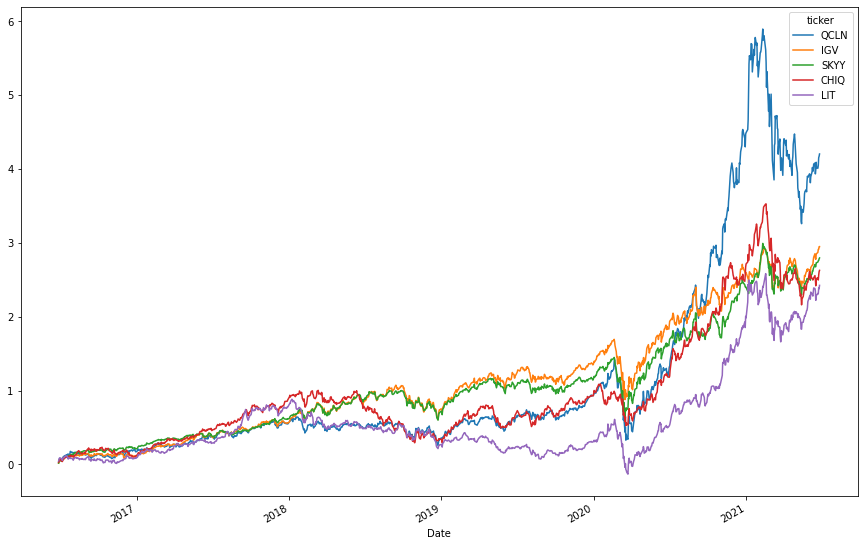

In [80]:
top5=ret.cumsum().iloc[-1].nlargest(5).to_frame().index.to_list()
top5
(ret.loc[:,top5].add(1).cumprod()-1).plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

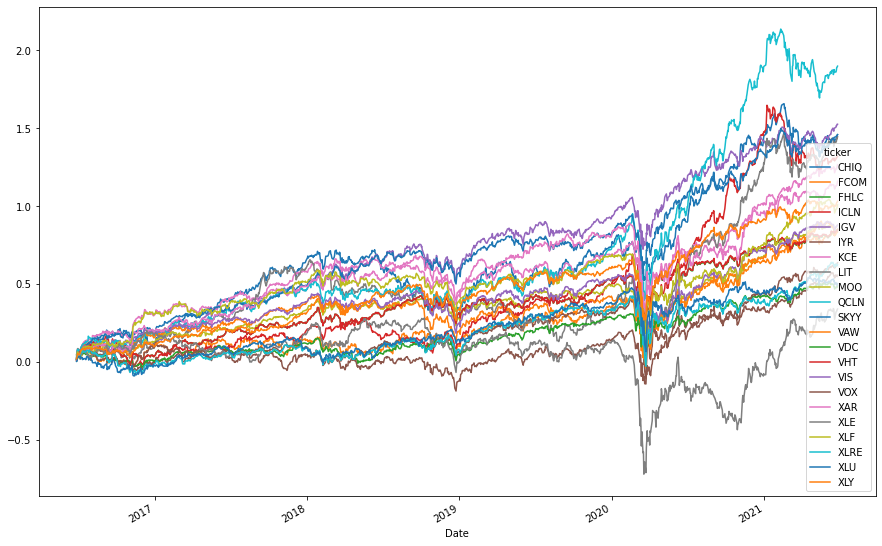

In [66]:
ret.cumsum().plot(figsize=(15,10))

In [81]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(ret, returns_data=True, compounding=True, frequency=252)
mu

ticker
CHIQ    0.294402
FCOM    0.158591
FHLC    0.164170
ICLN    0.255550
IGV     0.316619
IYR     0.091119
KCE     0.255648
LIT     0.279544
MOO     0.164287
QCLN    0.391408
SKYY    0.306190
VAW     0.151855
VDC     0.088695
VHT     0.165201
VIS     0.163189
VOX     0.111935
XAR     0.220302
XLE     0.013896
XLF     0.185517
XLRE    0.106430
XLU     0.081715
XLY     0.204723
dtype: float64

<AxesSubplot:xlabel='ticker', ylabel='ticker'>

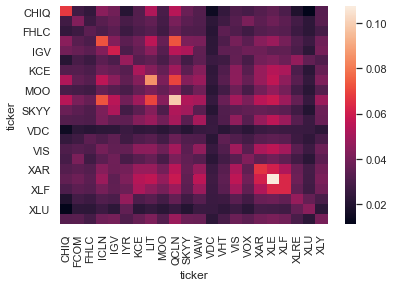

In [88]:
S = risk_models.sample_cov(ret, returns_data=True, frequency=252)
sns.heatmap(S)

In [100]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
raw_weights = ef.max_sharpe()
raw_weights

OrderedDict([('CHIQ', 0.1644316418139024),
             ('FCOM', 0.0),
             ('FHLC', 0.0),
             ('ICLN', 0.0),
             ('IGV', 0.0),
             ('IYR', 0.0),
             ('KCE', 0.1068579178474701),
             ('LIT', 0.0),
             ('MOO', 0.0),
             ('QCLN', 0.1708691189080274),
             ('SKYY', 0.5578413214306001),
             ('VAW', 0.0),
             ('VDC', 0.0),
             ('VHT', 0.0),
             ('VIS', 0.0),
             ('VOX', 0.0),
             ('XAR', 0.0),
             ('XLE', 0.0),
             ('XLF', 0.0),
             ('XLRE', 0.0),
             ('XLU', 0.0),
             ('XLY', 0.0)])

In [102]:
cleaned_weights = ef.clean_weights(cutoff=0.01, rounding=2)
print(cleaned_weights)

OrderedDict([('CHIQ', 0.16), ('FCOM', 0.0), ('FHLC', 0.0), ('ICLN', 0.0), ('IGV', 0.0), ('IYR', 0.0), ('KCE', 0.11), ('LIT', 0.0), ('MOO', 0.0), ('QCLN', 0.17), ('SKYY', 0.56), ('VAW', 0.0), ('VDC', 0.0), ('VHT', 0.0), ('VIS', 0.0), ('VOX', 0.0), ('XAR', 0.0), ('XLE', 0.0), ('XLF', 0.0), ('XLRE', 0.0), ('XLU', 0.0), ('XLY', 0.0)])


In [103]:
ef.portfolio_performance(verbose=True)

Expected annual return: 31.3%
Annual volatility: 21.9%
Sharpe Ratio: 1.34


(0.31341172268655126, 0.2187019328320113, 1.3416055308113157)

In [114]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.efficient_risk(0.25, market_neutral=False)
ef.clean_weights(cutoff=0.01, rounding=4)
ef.portfolio_performance(verbose=True)

Expected annual return: 34.7%
Annual volatility: 25.0%
Sharpe Ratio: 1.31


(0.3472520116495199, 0.24999999993880023, 1.3090080469185235)

In [118]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.efficient_return(0.10, market_neutral=False)
ef.clean_weights(cutoff=0.01, rounding=4)
ef.portfolio_performance(verbose=True)

Expected annual return: 12.8%
Annual volatility: 15.3%
Sharpe Ratio: 0.70


(0.12792198187741796, 0.1534728488518939, 0.7031991826877863)

In [120]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.max_quadratic_utility(risk_aversion=4, market_neutral=False)

OrderedDict([('CHIQ', 0.0920240960180932),
             ('FCOM', 0.0),
             ('FHLC', 0.0),
             ('ICLN', 0.0),
             ('IGV', 0.0547944251125357),
             ('IYR', 0.0),
             ('KCE', 0.0),
             ('LIT', 0.0),
             ('MOO', 0.0),
             ('QCLN', 0.3943807793062518),
             ('SKYY', 0.4588006995631191),
             ('VAW', 0.0),
             ('VDC', 0.0),
             ('VHT', 0.0),
             ('VIS', 0.0),
             ('VOX', 0.0),
             ('XAR', 0.0),
             ('XLE', 0.0),
             ('XLF', 0.0),
             ('XLRE', 0.0),
             ('XLU', 0.0),
             ('XLY', 0.0)])